In [1]:
import qiskit
from qiskit.visualization import plot_bloch_vector
import numpy as np

### 1 - Write a paragraph to explain how can you use a quantum system/concept to generate a random bitstring.



##### We can use quantum system/concept to generate a random bitstring : Like for example if we want to generate a bitstring of length for example n . Then we simply use or put a Hadamard gate on each qubit, then apply measurement and send our circuit to quantum computer with one shot. Repeat this m times. 
##### Finally, we will have m uniformly distributed random bit strings with length n.
##### And why this works is that Hadamard gate prepares equally distributed superposition.

### 2 - Implement the ideas that you came up with in the above paragraph by coding a quantum circuit in Qiskit and execute it on a simulator qasm_simulator.



In [10]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_bloch_multivector

def execute(circuit, shots):
    backend = Aer.get_backend("qasm_simulator")
    results = backend.run(transpile(circuit, backend), shots = shots).result()
    return results.get_counts()

In [11]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit

In [12]:
#Create a quantum circuit with 1 qubit and 4 classical bits.

qregister = QuantumRegister(1)
cregister = ClassicalRegister(4)

quantum = QuantumCircuit(qregister, cregister)

In [18]:
# This indicates that we want to measure the first qubit (idx: 0) 
quantum.measure_all()
# and write the result in the first (classical) bit (idx: 0) 
execute(quantum, shots = 1000)

{'0 0 0000': 1000}

### 3 -  Try to execute your circuit on a fake noisy backend. What do you observe? Compare the results you got from the simulator and from the fake noisy backend (you can use a metric called entropy). Try to explain the difference?

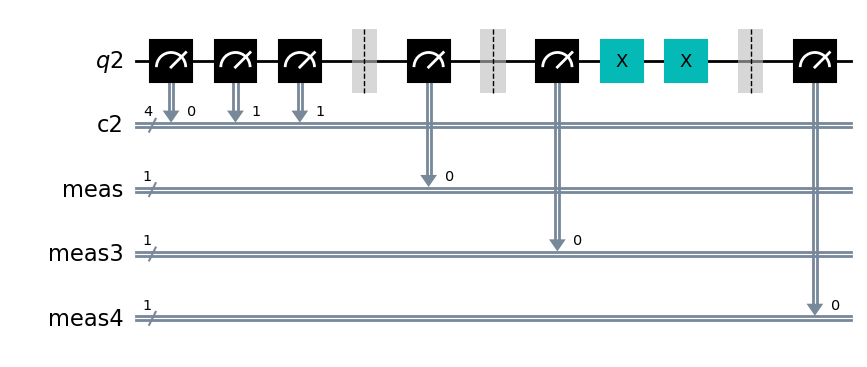

In [27]:
from qiskit.providers.fake_provider import FakeManila
quantum.x(0)
quantum.measure_all()
quantum.draw(output = "mpl")

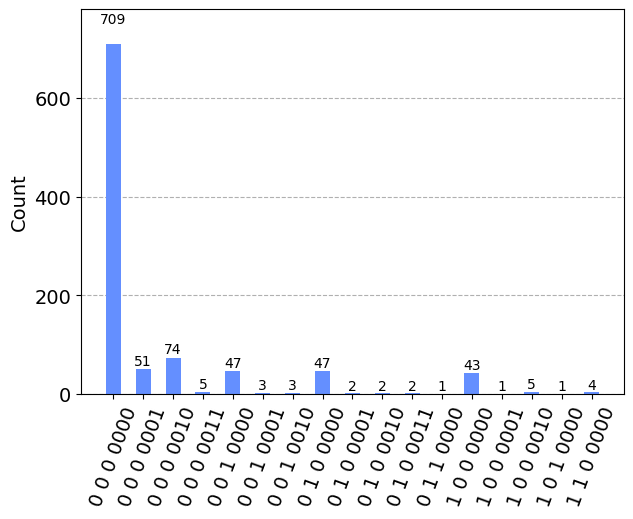

In [29]:
from qiskit.providers.fake_provider import FakeManila
from qiskit.visualization import plot_histogram


backend = FakeManila()
results = backend.run(transpile(quantum, backend), shots = 1000).result()
counts = results.get_counts()
plot_histogram(counts)

#### 4 - Try to come up with a list of ideas to improve the results that you got in task (3)?

In [30]:
from qiskit import IBMQ 

In [31]:
IBMQ.save_account('fe6ccb7a8f573d9403ae376eff720c312e51386508de1aad182f4a47bf356b89c1981321579469267f3de13c2eaa3a72909c3ccef23984d23c42803eb05776de')

In [32]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [34]:
provider = IBMQ.get_provider('ibm-q')

In [36]:
qcomp = provider.get_backend('ibmq_qasm_simulator')
result = execute(quantum, qcomp)

Simulation failed and returned the following error message:
ERROR: Failed to load qobj: to_json not implemented for this type of object: <class 'qiskit.providers.ibmq.ibmqbackend.IBMQSimulator'>


In [40]:
IBMQBackend.run(quantum)

ModuleNotFoundError: No module named 'qiskit.providers.ibmq.IBMQBackend'

In [ ]:
plot_histogram(result.get_counts(quantum))